In [1]:
import pandas as pd

# Load data

In [2]:
data = pd.read_csv(r"G:\MY PROJECTS\MACHINE LEARNING PROJECT\Internship\adult 3.csv")

# 1. Replace '?' in all object columns with 'Unknown'

In [3]:
for col in data.select_dtypes(include='object').columns:
    data[col].replace('?', 'Unknown', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_29316\3825166882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace('?', 'Unknown', inplace=True)


# 2. Remove unwanted values in categorical columns

In [4]:
# Remove rows with 'Without-pay' or 'Never-worked' in workclass
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]

In [5]:
# Remove rows with low education levels
data = data[~data['education'].isin(['Preschool', '1st-4th', '5th-6th'])]

In [6]:
# # Remove rows with 'Unknown' in occupation, native-country, marital-status, race, or gender
# for col in ['occupation', 'native-country', 'marital-status', 'race', 'gender']:
#     data = data[data[col] != 'Unknown']

# 3. Remove outliers in relevant numerical columns

## a) Age

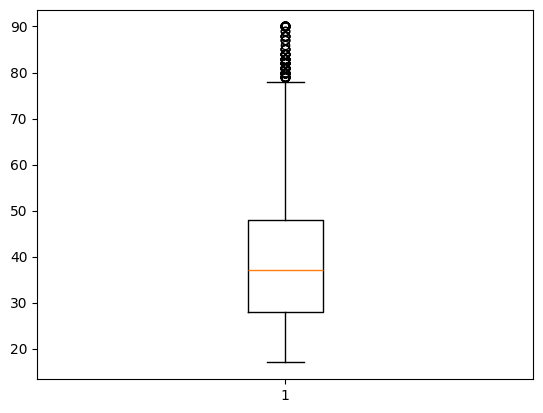

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

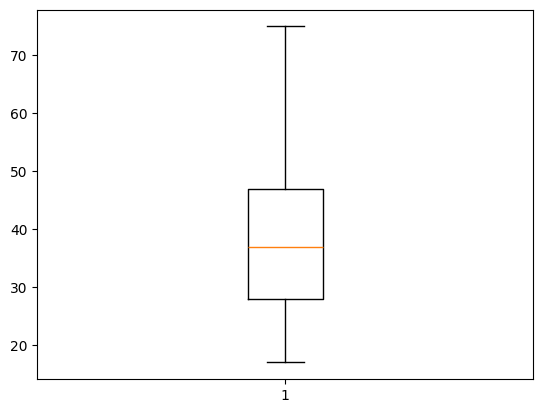

In [8]:
# Age: keep between 17 and 75
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
plt.boxplot(data['age'])
plt.show()

## b) Hours-per-week

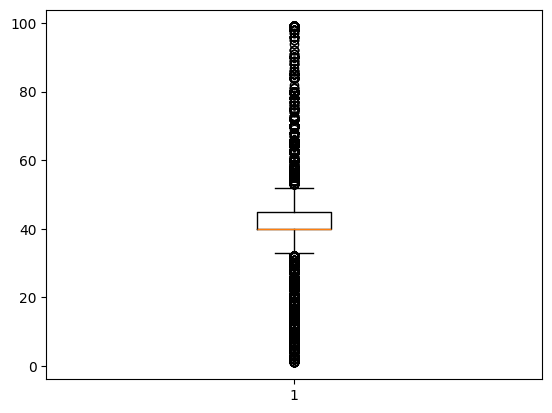

In [9]:
plt.boxplot(data['hours-per-week'])
plt.show()

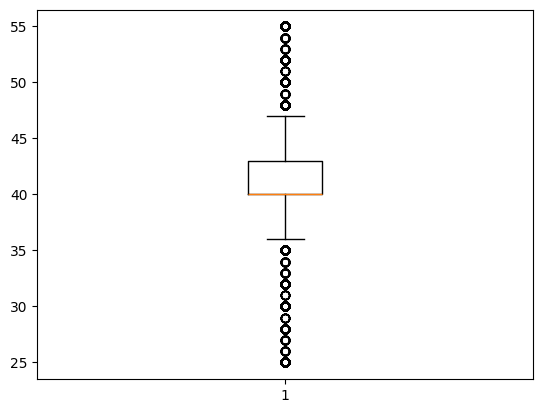

In [10]:
data = data[(data['hours-per-week'] >= 25) & (data['hours-per-week'] <= 55)]
plt.boxplot(data['hours-per-week'])
plt.show()

## c) Capital-gain

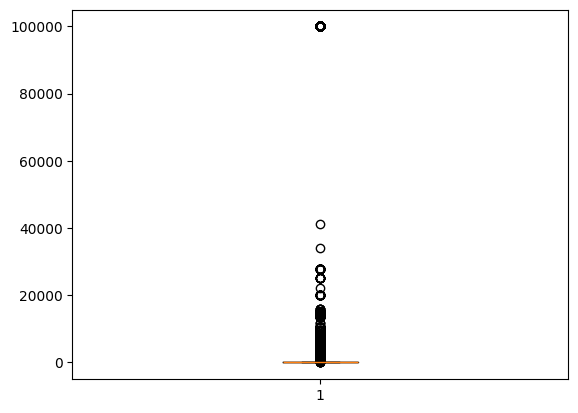

In [11]:
plt.boxplot(data['capital-gain'])
plt.show()

In [12]:
# Capital-gain: remove extreme outliers (keep <= 50000)
data = data[data['capital-gain'] <= 50000]

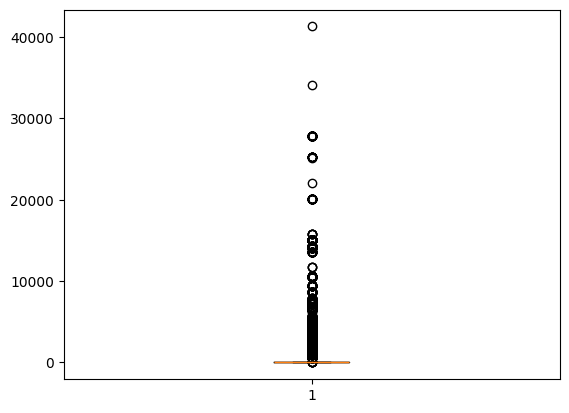

In [13]:
plt.boxplot(data['capital-gain'])
plt.show()

## d) Capital-loss

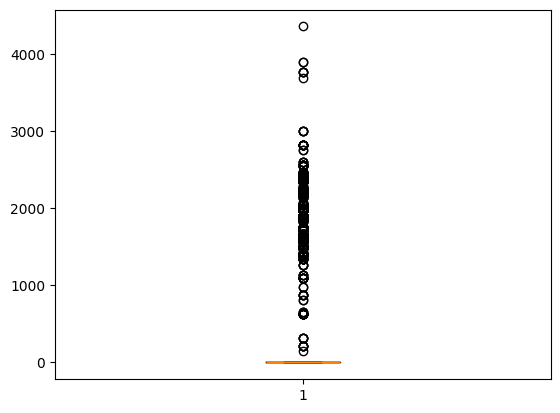

In [14]:
plt.boxplot(data['capital-loss'])
plt.show()

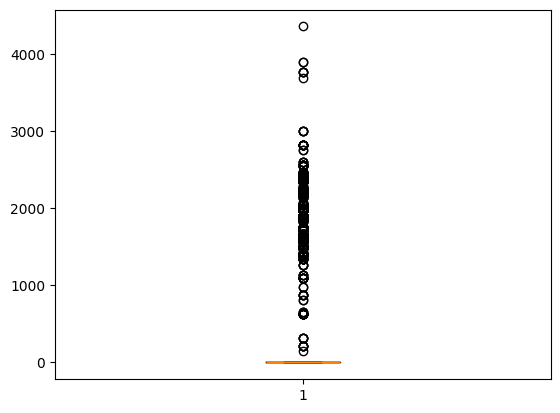

In [15]:
# Capital-loss: remove extreme outliers (keep <= 5000)
data = data[data['capital-loss'] <= 5000]
plt.boxplot(data['capital-loss'])
plt.show()

# 4. Drop redundant columns

In [16]:
# Drop 'education' because 'educational-num' is present
data.drop(columns=['education'], inplace=True)

# 5. Show the cleaned data shape

In [17]:
data.shape

(38771, 14)

In [18]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# 6. OneHot Encoding

In [19]:
print(data.columns.tolist())

['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [20]:
X = data.drop('income', axis=1)
y = data['income']

In [21]:
# Identify Column Types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

In [22]:
# # from sklearn.preprocessing import LabelEncoder

# # Identify categorical columns (object type)
# categorical_cols = data.select_dtypes(include='object').columns

# # # Initialize LabelEncoder
# # le = LabelEncoder()

# # # Apply LabelEncoder to each categorical column
# # for col in categorical_cols:
# #     data[col] = le.fit_transform(data[col])

# # # Show the encoded data
# # data
# from sklearn.preprocessing import LabelEncoder
# encoders = {}
# for col in categorical_cols:
#     le = LabelEncoder()
#     le.fit(data[col].astype(str))
#     encoders[col] = le
#     data[col] = le.transform(data[col].astype(str))

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Create preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# 2. Fit and transform X
X_processed = preprocessor.fit_transform(X)

# 3. Get feature names
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(cat_feature_names) + numerical_cols

# 4. Convert to DataFrame
X_df = pd.DataFrame(X_processed, columns=all_feature_names)

# 5. Reset y's index to match X_df if needed
y = y.reset_index(drop=True)

# 6. Concatenate X and y
data = pd.concat([X_df, y], axis=1)


In [23]:
data

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,-1.063091,0.343275,-1.378180,-0.235387,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,<=50K
1,-0.021239,-0.953895,-0.522232,-0.235387,-0.218709,1.577762,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,<=50K
2,-0.822664,1.386300,0.761690,-0.235387,-0.218709,-0.153795,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,>50K
3,0.459615,-0.286229,-0.094258,2.899349,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,>50K
4,-1.624088,-0.824327,-0.094258,-0.235387,-0.218709,-1.885352,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38766,-1.303518,1.132535,-0.094258,-0.235387,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,<=50K
38767,-0.902806,0.632086,0.761690,-0.235387,-0.218709,-0.500106,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,<=50K
38768,0.139046,-0.342562,-0.522232,-0.235387,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,>50K
38769,1.581610,-0.365894,-0.522232,-0.235387,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,<=50K


# 7. Separate features (X) and label (y)

In [24]:
X = data.drop('income', axis=1)
y = data['income']

# Show the shapes of X and y
print("Features shape:", X.shape)
print("Label shape:", y.shape)

Features shape: (38771, 90)
Label shape: (38771,)


In [25]:
X

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.063091,0.343275,-1.378180,-0.235387,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.021239,-0.953895,-0.522232,-0.235387,-0.218709,1.577762,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.822664,1.386300,0.761690,-0.235387,-0.218709,-0.153795,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.459615,-0.286229,-0.094258,2.899349,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.624088,-0.824327,-0.094258,-0.235387,-0.218709,-1.885352,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38766,-1.303518,1.132535,-0.094258,-0.235387,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38767,-0.902806,0.632086,0.761690,-0.235387,-0.218709,-0.500106,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38768,0.139046,-0.342562,-0.522232,-0.235387,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38769,1.581610,-0.365894,-0.522232,-0.235387,-0.218709,-0.153795,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
38766    <=50K
38767    <=50K
38768     >50K
38769    <=50K
38770     >50K
Name: income, Length: 38771, dtype: object

# 8. Standardization of the numerical data

In [27]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Show the standardized
X

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.063091,0.343275,-1.378180,-0.235387,-0.218709,-0.153795,-0.185073,-0.271297,0.626847,-0.171838,...,-0.062321,-0.020944,-0.042529,-0.035935,-0.02328,-0.02328,0.321009,-0.132002,-0.041916,-0.020319
1,-0.021239,-0.953895,-0.522232,-0.235387,-0.218709,1.577762,-0.185073,-0.271297,0.626847,-0.171838,...,-0.062321,-0.020944,-0.042529,-0.035935,-0.02328,-0.02328,0.321009,-0.132002,-0.041916,-0.020319
2,-0.822664,1.386300,0.761690,-0.235387,-0.218709,-0.153795,-0.185073,3.685991,-1.595287,-0.171838,...,-0.062321,-0.020944,-0.042529,-0.035935,-0.02328,-0.02328,0.321009,-0.132002,-0.041916,-0.020319
3,0.459615,-0.286229,-0.094258,2.899349,-0.218709,-0.153795,-0.185073,-0.271297,0.626847,-0.171838,...,-0.062321,-0.020944,-0.042529,-0.035935,-0.02328,-0.02328,0.321009,-0.132002,-0.041916,-0.020319
4,-1.624088,-0.824327,-0.094258,-0.235387,-0.218709,-1.885352,-0.185073,-0.271297,-1.595287,-0.171838,...,-0.062321,-0.020944,-0.042529,-0.035935,-0.02328,-0.02328,0.321009,-0.132002,-0.041916,-0.020319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38766,-1.303518,1.132535,-0.094258,-0.235387,-0.218709,-0.153795,-0.185073,-0.271297,0.626847,-0.171838,...,-0.062321,-0.020944,-0.042529,-0.035935,-0.02328,-0.02328,0.321009,-0.132002,-0.041916,-0.020319
38767,-0.902806,0.632086,0.761690,-0.235387,-0.218709,-0.500106,-0.185073,-0.271297,0.626847,-0.171838,...,-0.062321,-0.020944,-0.042529,-0.035935,-0.02328,-0.02328,0.321009,-0.132002,-0.041916,-0.020319
38768,0.139046,-0.342562,-0.522232,-0.235387,-0.218709,-0.153795,-0.185073,-0.271297,0.626847,-0.171838,...,-0.062321,-0.020944,-0.042529,-0.035935,-0.02328,-0.02328,0.321009,-0.132002,-0.041916,-0.020319
38769,1.581610,-0.365894,-0.522232,-0.235387,-0.218709,-0.153795,-0.185073,-0.271297,0.626847,-0.171838,...,-0.062321,-0.020944,-0.042529,-0.035935,-0.02328,-0.02328,0.321009,-0.132002,-0.041916,-0.020319


# 9. Training

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

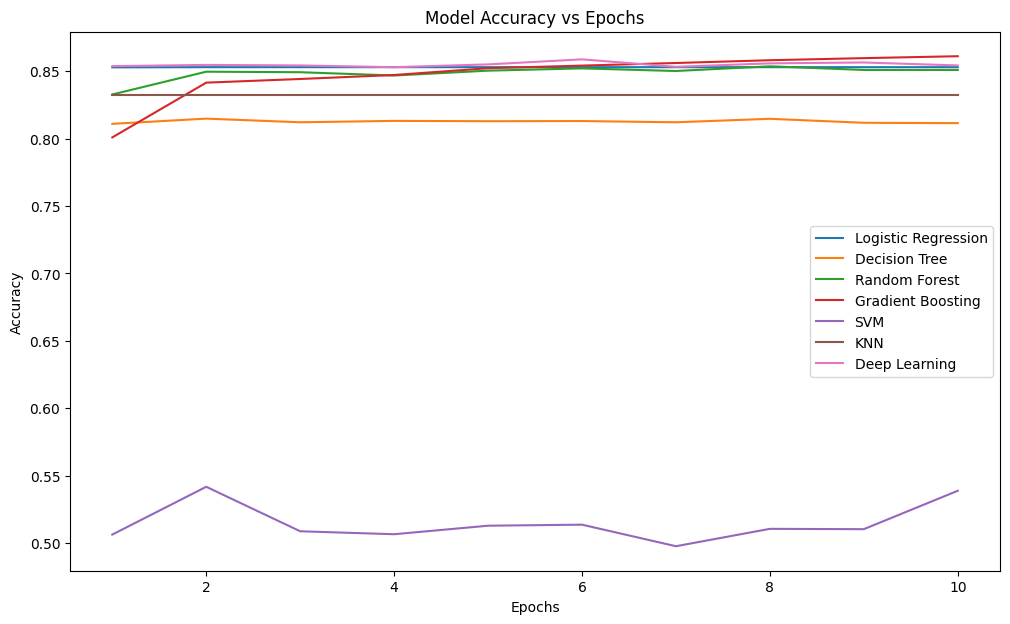

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# For deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Binary encode the target column
y = y.map({'<=50K': 0, '>50K': 1})

# Split into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classical ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50),
    "SVM": SVC(max_iter=1000, probability=True),
    "KNN": KNeighborsClassifier()
}

epochs = 10
accuracies = {name: [] for name in models.keys()}
accuracies["Deep Learning"] = []

# Train classical ML models for each epoch (simulate epochs by refitting)
for epoch in range(1, epochs + 1):
    for name, model in models.items():
        if hasattr(model, 'n_estimators'):
            model.set_params(n_estimators=epoch * 5)  # Increase trees per epoch
        if hasattr(model, 'max_iter'):
            model.set_params(max_iter=epoch * 10)
        pipe = Pipeline([('clf', model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies[name].append(acc)

X_train_dl = np.asarray(X_train).astype(np.float32)
X_test_dl = np.asarray(X_test).astype(np.float32)
y_train_dl = np.asarray(y_train).astype(np.float32)
y_test_dl = np.asarray(y_test).astype(np.float32)

# Deep Learning model (Keras)
for epoch in range(1, epochs + 1):
    dl_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_dl.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    dl_model.fit(X_train_dl, y_train_dl, epochs=epoch, batch_size=32, verbose=0)
    loss, acc = dl_model.evaluate(X_test_dl, y_test_dl, verbose=0)
    accuracies["Deep Learning"].append(acc)

# Plotting
plt.figure(figsize=(12, 7))
for name, acc in accuracies.items():
    plt.plot(range(1, epochs + 1), acc, label=name)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.legend()

In [29]:
import pandas as pd

# Prepare results as a table
results = []
for name, acc in accuracies.items():
    results.append({
        "Model": name,
        "Max Accuracy": np.max(acc),
        "Min Accuracy": np.min(acc),
        "Mean Accuracy": np.mean(acc),
        "Accuracy at Last Epoch": acc[-1]
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Max Accuracy  Min Accuracy  Mean Accuracy  \
0  Logistic Regression      0.852998      0.852869       0.852985   
1        Decision Tree      0.814829      0.810961       0.812701   
2        Random Forest      0.853643      0.832753       0.848665   
3    Gradient Boosting      0.861122      0.800903       0.847531   
4                  SVM      0.541715      0.497614       0.514674   
5                  KNN      0.832624      0.832624       0.832624   
6        Deep Learning      0.858801      0.852998       0.854945   

   Accuracy at Last Epoch  
0                0.852998  
1                0.811476  
2                0.850935  
3                0.861122  
4                0.538749  
5                0.832624  
6                0.854288  


# 10. Optimization and Hyperparameter Tuning
1. Used GridSearchCV for hyperparameter tuning of all classical models.<br/>
2. Improved the deep learning model with more layers, dropout, and more epochs.

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


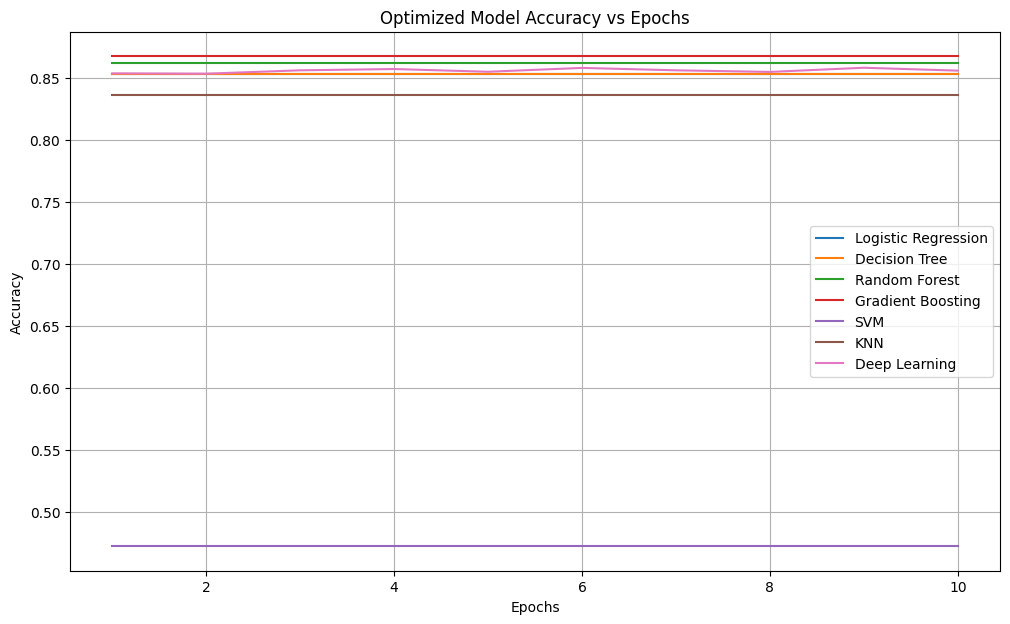

                 Model  Max Accuracy  Min Accuracy  Mean Accuracy  \
0  Logistic Regression      0.852998      0.852998       0.852998   
1        Decision Tree      0.853385      0.853385       0.853385   
2        Random Forest      0.861896      0.861896       0.861896   
3    Gradient Boosting      0.867311      0.867311       0.867311   
4                  SVM      0.472727      0.472727       0.472727   
5                  KNN      0.836106      0.836106       0.836106   
6        Deep Learning      0.858027      0.853256       0.855680   

   Accuracy at Last Epoch  
0                0.852998  
1                0.853385  
2                0.861896  
3                0.867311  
4                0.472727  
5                0.836106  
6                0.855706  


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# # Binary encode the target column
# y = y.map({'<=50K': 0, '>50K': 1})


# Split into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for tuning
param_grids = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "Decision Tree": {'clf__max_depth': [5, 10, 20], 'clf__min_samples_split': [2, 5, 10]},
    "Random Forest": {'clf__n_estimators': [50, 100], 'clf__max_depth': [10, 20]},
    "Gradient Boosting": {'clf__n_estimators': [50, 100], 'clf__learning_rate': [0.05, 0.1]},
    "SVM": {'clf__C': [0.5, 1, 2], 'clf__kernel': ['rbf', 'linear']},
    "KNN": {'clf__n_neighbors': [3, 5, 7]}
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True, max_iter=1000),
    "KNN": KNeighborsClassifier()
}

best_estimators = {}
accuracies = {}

# Grid Search for each model
for name, model in models.items():
    pipe = Pipeline([('clf', model)])
    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = [acc] * 10  # For plotting, repeat accuracy for each epoch

X_train_dl = np.asarray(X_train).astype(np.float32)
X_test_dl = np.asarray(X_test).astype(np.float32)
y_train_dl = np.asarray(y_train).astype(np.float32)
y_test_dl = np.asarray(y_test).astype(np.float32)

# Deep Learning model with Dropout and more epochs
dl_accuracies = []
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
for epoch in range(1, 11):
    dl_model.fit(X_train_dl, y_train_dl, epochs=1, batch_size=32, verbose=0)
    loss, acc = dl_model.evaluate(X_test_dl, y_test_dl, verbose=0)
    dl_accuracies.append(acc)
accuracies["Deep Learning"] = dl_accuracies

# Plotting
plt.figure(figsize=(12, 7))
for name, acc in accuracies.items():
    plt.plot(range(1, 11), acc, label=name)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized Model Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Prepare results as a table
results = []
for name, acc in accuracies.items():
    results.append({
        "Model": name,
        "Max Accuracy": np.max(acc),
        "Min Accuracy": np.min(acc),
        "Mean Accuracy": np.mean(acc),
        "Accuracy at Last Epoch": acc[-1]
    })
results_df = pd.DataFrame(results)
print(results_df)

# Python API

In [31]:


import joblib

# Save scaler and label encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

# Save column lists
joblib.dump(list(numerical_cols), 'numerical_cols.pkl')
joblib.dump(list(categorical_cols), 'categorical_cols.pkl')

# Save results_df (model accuracy table)
results_df.to_pickle('results_df.pkl')

# Save all classical models
joblib.dump(best_estimators["Logistic Regression"], 'logreg.pkl')
joblib.dump(best_estimators["Decision Tree"], 'dtree.pkl')
joblib.dump(best_estimators["Random Forest"], 'rf.pkl')
joblib.dump(best_estimators["Gradient Boosting"], 'gb.pkl')
joblib.dump(best_estimators["SVM"], 'svm.pkl')
joblib.dump(best_estimators["KNN"], 'knn.pkl')

# If you have a deep learning model (Keras), use:
from tensorflow.keras.models import load_model
dl_model.save('dl_model.h5')